In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('dataset/in_and_out.csv', encoding='cp949')
data

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202504,1호선,동대문,650,26,11355,2005,10238,7181,18411,...,9939,938,3210,3,321,0,0,0,0,20250503
1,202504,1호선,동묘앞,117,3,2844,819,4206,5444,9689,...,4897,120,1996,3,267,0,0,0,0,20250503
2,202504,1호선,서울역,712,48,10654,9668,29272,64058,97455,...,29252,5212,8018,10,262,0,0,0,0,20250503
3,202504,1호선,시청,124,5,2267,5900,3888,28761,7841,...,3763,606,1015,0,15,0,0,0,0,20250503
4,202504,1호선,신설동,381,18,9393,2330,10420,9020,24157,...,9416,455,3039,0,0,1,2,0,0,20250503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14857,202305,중앙선,원덕,95,0,394,6,740,182,885,...,328,3,80,0,0,0,0,0,0,20230603
14858,202305,중앙선,중랑,153,5,6886,593,10126,2329,24074,...,5311,34,486,0,0,0,0,0,0,20230603
14859,202305,중앙선,지평,0,0,0,0,4,2,384,...,0,0,0,0,0,0,0,0,0,20230603
14860,202305,중앙선,팔당,0,0,259,78,726,728,1658,...,202,0,0,0,0,0,0,0,0,20230603


c:\Users\kkh02\llll\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0812 - mae: 0.2039 - val_loss: 0.0367 - val_mae: 0.1362
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0328 - mae: 0.1295 - val_loss: 0.0276 - val_mae: 0.1397
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0251 - mae: 0.1242 - val_loss: 0.0223 - val_mae: 0.1114
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0225 - mae: 0.1099 - val_loss: 0.0194 - val_mae: 0.1073
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0201 - mae: 0.1065 - val_loss: 0.0188 - val_mae: 0.1036
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0180 - mae: 0.1003 - val_loss: 0.0179 - val_mae: 0.1043
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0172 - mae: 0.0961 - val_loss: 0.0177 - val_mae: 0.1003
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - mae: 0.0951 - val_loss: 0.0169 - val_mae: 0.1013
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

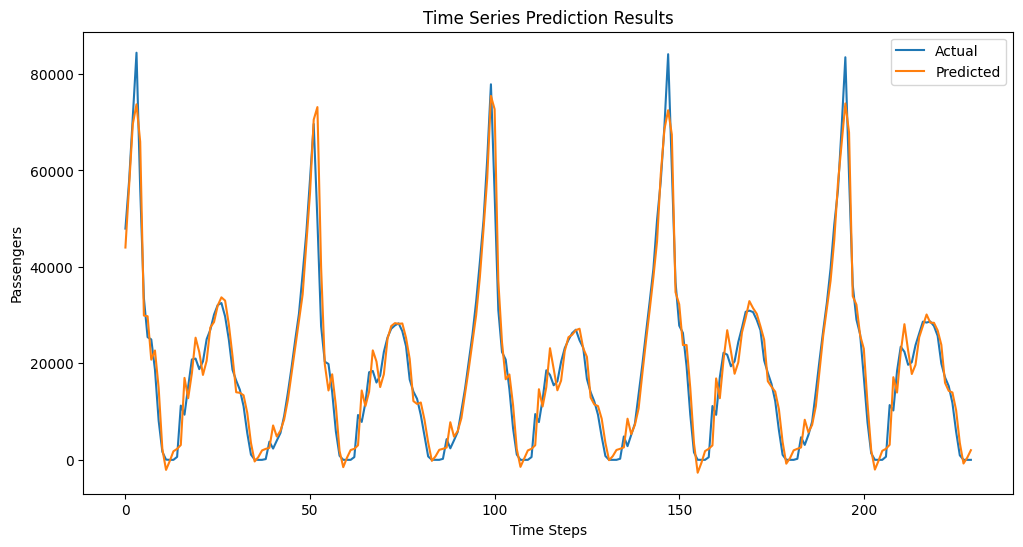

In [2]:
# 예시: 특정 역만 추출
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.layers import LSTM


station = data['지하철역'].unique()[0]  # 첫 번째 역
df_station = data[data['지하철역'] == station].sort_values('사용월')

# 시간대별 승차인원만 추출
boarding_cols = [col for col in data.columns if '승차인원' in col]
series = df_station[boarding_cols].values.flatten()  # 1D 시계열

# 스케일링
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series.reshape(-1,1)).flatten()

# 시퀀스 생성
def create_sequences(series, window=6):
    X, y = [], []
    for i in range(len(series)-window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X), np.array(y)

window_size = 3
X, y = create_sequences(series_scaled, window=window_size)

# train/test 분할
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM 입력 형태로 변환
X_train = X_train.reshape(-1, window_size, 1)
X_test = X_test.reshape(-1, window_size, 1)

# 5. 모델 아키텍처
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.3),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(1)
])

# 6. 학습률 스케줄링
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9
)

# 7. 모델 컴파일
model.compile(
    optimizer=Adam(learning_rate=lr_schedule),
    loss='mse',
    metrics=['mae']
)

# 8. 조기 종료 설정
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.0001,
    restore_best_weights=True
)

# 9. 모델 학습
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# 10. 성능 평가
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'\nTest Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}')

# 11. 예측 결과 시각화
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_inv = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Time Series Prediction Results')
plt.xlabel('Time Steps')
plt.ylabel('Passengers')
plt.legend()
plt.show()

## 1. SHAP 분석 적용

In [16]:
from lime import lime_tabular

# LIME Explainer 구성
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=X_train.reshape(-1, window_size),
    feature_names=[f't-{i}' for i in range(window_size,0,-1)],
    mode='regression'
)

# 개별 샘플 설명
exp = explainer_lime.explain_instance(
    X_test[0].reshape(-1), 
    lambda x: model.predict(x.reshape(-1, window_size, 1)).flatten()
)

# 결과 시각화
exp.show_in_notebook()


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


1. 예측값(Predicted value)

모델이 예측한 값은 0.48입니다.

이 값은 전체 모델 예측값 분포에서 -0.49(최소) ~ 1.24(최대) 사이에 위치합니다.

2. Feature 영향력

t-1(가장 최근 시간대): 값 0.41, 예측값을 0.60만큼 양(+)의 방향으로 크게 끌어올림 (positive, 주황색)

t-2: 값 0.34, 예측값을 -0.17만큼 음(-)의 방향으로 끌어내림 (negative, 파란색)

t-3: 값 0.26, 예측값을 -0.02만큼 음(-)의 방향으로 약하게 끌어내림 (negative, 파란색)

3. 해석 요약

이 예측에서 가장 큰 영향을 미친 특징은 t-1(0.41)로, 예측값을 크게 증가시키는 역할을 했습니다.

t-2와 t-3은 각각 예측값을 소폭 낮추는 방향으로 작용했습니다.

즉, 가장 최근의 승차 인원(t-1)이 다음 시간대 예측에 가장 중요한 역할을 하며, 이전 시간대(t-2, t-3)는 상대적으로 영향이 작거나 음의 방향으로 작용합니다.

4. 결론

LSTM 시계열 모델은 직전 시간대(t-1)의 승차 인원 변화에 가장 민감하게 반응하며, 이 값이 높을수록 다음 시간대 승차 인원 예측도 높아집니다.

t-2, t-3은 예측에 보조적인 역할을 하며, 일부 상황에서는 예측값을 낮추는 쪽으로 기여할 수 있습니다.

In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error

# 예측값과 실제값 준비 (y_test_inv, y_pred_inv)
# X_test에는 시간대 정보가 있다고 가정

# 시간대 정보 추출 (예: t-1, t-2, t-3 중 가장 최근 시간대 사용)
time_indices = np.arange(len(y_test_inv)) % 24  # 24시간 주기라면

results = []
for hour in range(24):
    idx = (time_indices == hour)
    if np.sum(idx) > 0:
        mae = mean_absolute_error(y_test_inv[idx], y_pred_inv[idx])
        results.append({'hour': hour, 'MAE': mae})

df_subgroup = pd.DataFrame(results)
print(df_subgroup)


    hour          MAE
0      0  2367.408008
1      1  1240.942969
2      2  1493.669531
3      3  4439.827539
4      4  7392.053906
5      5  4627.611719
6      6  2272.928125
7      7  2036.590918
8      8  3186.538477
9      9  4653.169434
10    10  1863.589661
11    11  1205.256895
12    12   458.014799
13    13  1948.105322
14    14  1865.120280
15    15  4967.819010
16    16  6281.719347
17    17  1733.443576
18    18  1618.776747
19    19  3682.304470
20    20  2656.620334
21    21  1952.912109
22    22  3038.842448
23    23  1277.999783


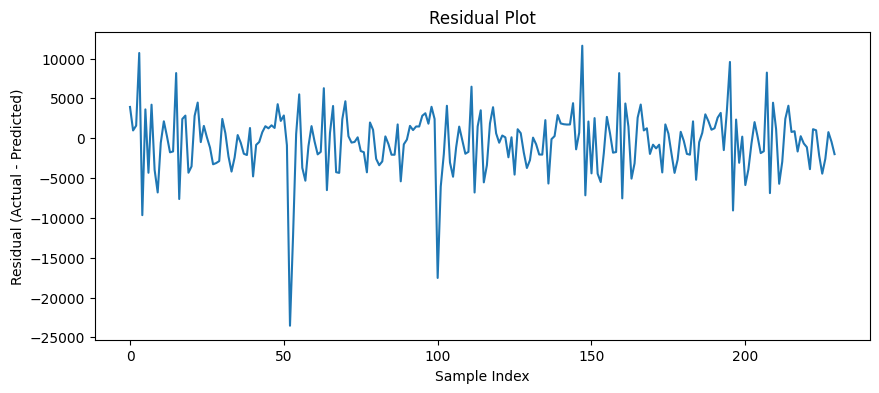

In [21]:
import matplotlib.pyplot as plt

residuals = y_test_inv.flatten() - y_pred_inv.flatten()
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residual Plot')
plt.xlabel('Sample Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()


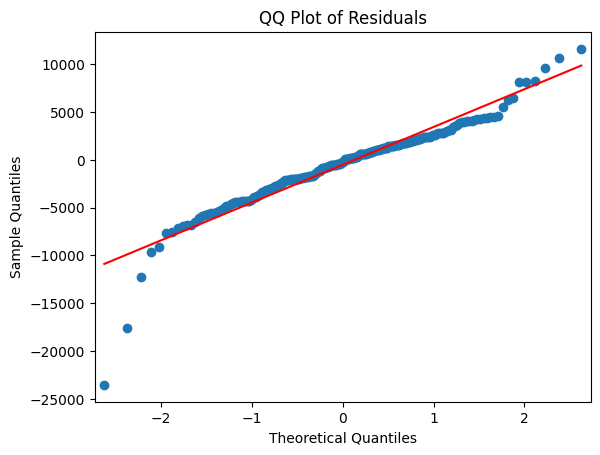

In [22]:
import statsmodels.api as sm

sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()


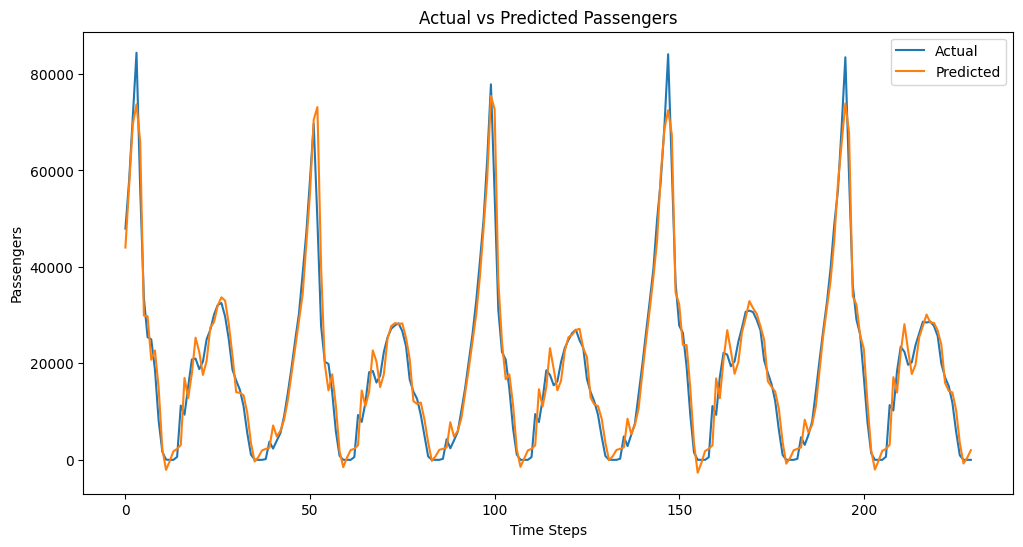

In [23]:
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Actual vs Predicted Passengers')
plt.xlabel('Time Steps')
plt.ylabel('Passengers')
plt.legend()
plt.show()
